#**MODEL TRAINING AND EVALUATION**



---

# **7. Predictive Models: Training, Prediction and Comparison**

The next step is to run predictive models using the features generated. We have to split our features into training and test datasets. The following are key steps followed:

 - Load Preprocessed Data
 - Define Dependent and Independent Variables
 - Data Balancing:
  - Apply resampling techniques to adjust the dataset by oversampling the minority class or undersampling the majority class, e.g SMOTE
 - Data Splitting (divide the data into):
  - Training Set: Used to train the model (e.g., 70-80% of the data).
  - Validation Set: Used for hyperparameter tuning (optional, ~10-15%).
  - Test Set: Used to evaluate the model’s performance (~10-15%).
 - Model Selection:
  - Choose appropriate algorithms based on the nature of the problem (e.g., linear regression for continuous variables, decision trees for classification) and dataset characteristics (size, dimensionality, sparsity).
 - Model Training:
  - Train the chosen model on the training data,
  - Monitor training metrics to identify potential overfitting or underfitting.
 - Hyperparameter Tuning:
  - Adjust the algorithm’s hyperparameters to improve performance.
 - Model Evaluation:
  - Evaluate the model using the test set or cross-validation.
 - Model Deployment:
  - Save the Model: Use serialization formats like Pickle, Joblib, or ONNX.
  - Deploy the Model: Integrate into a production environment.
 - Monitoring and Maintenance:
  - Continuously monitor the model’s performance in production,
  - Retrain the model periodically with new data to handle concept drift,
  - Address potential scalability and latency issues.

In [ ]:
# drive module for mounting gdrive storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis'

Mounted at /content/gdrive
/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis


In [ ]:
# basic libraries for statistics and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB

# import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

# saving model with the help of pickle
import pickle



---


## **7.1 Load Preprocessed and Normalized Data**


---

In [ ]:
# Load pca_data from csv file
pca_df = pd.read_csv('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/2-data/1-processed/pca_data.csv')

In [ ]:
# check dataset head
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,PerformanceRating
0,4.457677,-1.366712,1.245191,-0.934923,1.151176,0.691766,0.965128,1.392092,0.466587,-0.459494,...,-0.867073,-0.150942,0.465075,-0.010234,-0.086346,-0.211241,0.542512,0.174449,-0.297022,3
1,4.354452,0.322614,2.006411,-1.503321,0.026969,-0.958660,1.558917,-0.219267,0.899079,-0.923479,...,-0.558585,0.357000,-0.462485,0.964303,0.258629,-0.273413,0.624902,-0.093444,-0.762420,3
2,4.274056,2.986370,3.827868,0.210795,1.738617,-0.725024,-0.293803,-1.106182,0.450945,-1.953939,...,0.735923,-0.497544,-0.548766,-0.216602,-0.156165,0.349514,0.236918,-0.802177,0.222814,4
3,-3.004228,1.229310,2.176705,-3.279669,-1.880958,2.380688,-0.045921,0.098410,-0.104206,0.190539,...,0.296253,-0.937112,1.518210,-0.682029,-0.001905,0.197987,0.456112,0.042474,-0.431119,3
4,4.291852,6.227948,-0.741681,-0.781522,-2.311858,-1.207452,-0.470273,0.601634,0.693299,-1.140106,...,-0.573912,0.322342,-0.873149,1.077295,-0.907195,0.212755,0.412879,0.344173,-0.017923,3




---


## **7.2 Define Dependent and Independent Variables**


---

Performance Rating is our target, whilst all other features are independent variables.

In [ ]:
# Define dependent (target) and independent variables

X = pca_df.drop('PerformanceRating', axis=1)
y = pca_df['PerformanceRating']


In [ ]:
# check head for x
X.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25
0,4.457677,-1.366712,1.245191,-0.934923,1.151176,0.691766,0.965128,1.392092,0.466587,-0.459494,...,0.748105,-0.867073,-0.150942,0.465075,-0.010234,-0.086346,-0.211241,0.542512,0.174449,-0.297022
1,4.354452,0.322614,2.006411,-1.503321,0.026969,-0.958660,1.558917,-0.219267,0.899079,-0.923479,...,0.252151,-0.558585,0.357000,-0.462485,0.964303,0.258629,-0.273413,0.624902,-0.093444,-0.762420
2,4.274056,2.986370,3.827868,0.210795,1.738617,-0.725024,-0.293803,-1.106182,0.450945,-1.953939,...,1.246647,0.735923,-0.497544,-0.548766,-0.216602,-0.156165,0.349514,0.236918,-0.802177,0.222814
3,-3.004228,1.229310,2.176705,-3.279669,-1.880958,2.380688,-0.045921,0.098410,-0.104206,0.190539,...,-1.538095,0.296253,-0.937112,1.518210,-0.682029,-0.001905,0.197987,0.456112,0.042474,-0.431119
4,4.291852,6.227948,-0.741681,-0.781522,-2.311858,-1.207452,-0.470273,0.601634,0.693299,-1.140106,...,-0.683931,-0.573912,0.322342,-0.873149,1.077295,-0.907195,0.212755,0.412879,0.344173,-0.017923


In [ ]:
# check head for y
y.head()

,PerformanceRating
0,3
1,3
2,4
3,3
4,3




---


## **7.3 Data Balancing**


---


We balance our target feature data using SMOTE technique.

In [ ]:
# use SMOTE(synthetic minority oversampling techinque) to balance target data

from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE()
print("unbalanced data   :  ",Counter(y))
X_sm,y_sm = sm.fit_resample(X,y)
print("balanced data:    :",Counter(y_sm))

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})




---


## **7.4 Split Training and Testing Data**


---


We split the data into training/testing set in the ratio 75:25

In [ ]:
# Split the data into training/testing set in the ratio 75:25

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)


In [ ]:
# print shape of train test

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1966, 25)
Shape of X_test: (656, 25)
Shape of y_train: (1966,)
Shape of y_test: (656,)




---

## **7.5 Model Selection, Training and Evaluation**


---

We'll iterate with a number of algorithms and choose the best based on performance criterion.


### **7.5.1 Logistic Regression Classifier**

In [ ]:
# define logistic regression classification,training and predicting for test samples
model1=LogisticRegression()
model1_fit=model1.fit(X_train,y_train)

# Prediction on training data
lreg_train_predict = model1_fit.predict(X_train)

# Prediction on testing data
lreg_test_predict = model1_fit.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
lreg_train_accuracy = accuracy_score(lreg_train_predict,y_train)
print("Training accuracy:",lreg_train_accuracy)
print("Classification report of training: \n",classification_report(lreg_train_predict,y_train))

Training accuracy: 0.9043743641912513
Classification report of training: 
               precision    recall  f1-score   support

           2       0.95      0.90      0.92       674
           3       0.82      0.89      0.86       614
           4       0.94      0.92      0.93       678

    accuracy                           0.90      1966
   macro avg       0.91      0.90      0.90      1966
weighted avg       0.91      0.90      0.91      1966





---
**Testing Accuracy**


---




In [ ]:
lreg_test_accuracy = accuracy_score(lreg_test_predict,y_test)
print("Testing accuracy:",lreg_test_accuracy*100)
print("Precision Score:", precision_score(lreg_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(lreg_test_predict,y_test))

Testing accuracy: 89.63414634146342
Precision Score: 89.74044327168747
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.94      0.92      0.93       242
           3       0.83      0.86      0.85       200
           4       0.92      0.91      0.91       214

    accuracy                           0.90       656
   macro avg       0.89      0.89      0.89       656
weighted avg       0.90      0.90      0.90       656



In [ ]:
pd.crosstab(lreg_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,222,19,1
3,11,172,17
4,4,16,194


### **7.5.2 Decision Tree Classifier**

In [ ]:
# define the Decision tree classification,training and predicting for test samples

model2=DecisionTreeClassifier()
model2_fit=model2.fit(X_train,y_train)

# Prediction on training data
dtcl_train_predict = model2_fit.predict(X_train)

# Prediction on testing data
dtcl_test_predict = model2_fit.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
dtcl_train_accuracy = accuracy_score(dtcl_train_predict,y_train)
print("Training accuracy:",dtcl_train_accuracy)
print("Classification report of training: \n",classification_report(dtcl_train_predict,y_train))

Training accuracy: 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       637
           3       1.00      1.00      1.00       667
           4       1.00      1.00      1.00       662

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966





---
**Testing Accuracy**


---




In [ ]:
dtcl_test_accuracy = accuracy_score(dtcl_test_predict,y_test)
print("Testing accuracy:",dtcl_test_accuracy*100)
print("Precision Score:", precision_score(dtcl_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(dtcl_test_predict,y_test))

Testing accuracy: 82.46951219512195
Precision Score: 82.64014007366919
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.86      0.86      0.86       235
           3       0.73      0.76      0.74       200
           4       0.88      0.85      0.86       221

    accuracy                           0.82       656
   macro avg       0.82      0.82      0.82       656
weighted avg       0.83      0.82      0.83       656



In [ ]:
pd.crosstab(dtcl_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,203,29,3
3,27,151,22
4,7,27,187


### **7.5.3 Random Forest**

In [ ]:
# defining the Random Forest classification,training and predicting for test samples

model3=RandomForestClassifier()
model3_fit=model3.fit(X_train,y_train)

# Prediction on training data
rfrs_train_predict = model3_fit.predict(X_train)

# Prediction on testing data
rfrs_test_predict = model3_fit.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
rfrs_train_accuracy = accuracy_score(rfrs_train_predict,y_train)
print("Training accuracy:",rfrs_train_accuracy)
print("Classification report of training: \n",classification_report(rfrs_train_predict,y_train))

Training accuracy: 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       637
           3       1.00      1.00      1.00       667
           4       1.00      1.00      1.00       662

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966





---
**Testing Accuracy**


---




In [ ]:
rfrs_test_accuracy = accuracy_score(rfrs_test_predict,y_test)
print("Testing accuracy:",rfrs_test_accuracy*100)
print("Precision Score:", precision_score(rfrs_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(rfrs_test_predict,y_test))

Testing accuracy: 95.42682926829268
Precision Score: 95.51114738232252
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.98      0.94      0.96       247
           3       0.91      0.94      0.93       200
           4       0.96      0.98      0.97       209

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.96      0.95      0.95       656



In [ ]:
pd.crosstab(rfrs_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,233,13,1
3,4,189,7
4,0,5,204


### **7.5.4 Support Vector Machine**

In [ ]:
# Training the model
rbf_svc = SVC(kernel='rbf', C=100, random_state=10).fit(X_train,y_train)

# Prediction on training data
svc_train_predict = rbf_svc.predict(X_train)

# Prediction on testing data
svc_test_predict = rbf_svc.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
svc_train_accuracy = accuracy_score(svc_train_predict,y_train)
print("Training accuracy:",svc_train_accuracy)
print("Classification report of training: \n",classification_report(svc_train_predict,y_train))

Training accuracy: 1.0
Classification report of training: 
               precision    recall  f1-score   support

           2       1.00      1.00      1.00       637
           3       1.00      1.00      1.00       667
           4       1.00      1.00      1.00       662

    accuracy                           1.00      1966
   macro avg       1.00      1.00      1.00      1966
weighted avg       1.00      1.00      1.00      1966





---
**Testing Accuracy**


---




In [ ]:
svc_test_accuracy = accuracy_score(svc_test_predict,y_test)
print("Testing accuracy:",svc_test_accuracy*100)
print("Precision Score:", precision_score(svc_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(svc_test_predict,y_test))

Testing accuracy: 96.95121951219512
Precision Score: 97.24578767526805
Classification report of testing: 
               precision    recall  f1-score   support

           2       1.00      0.95      0.97       250
           3       0.90      1.00      0.95       187
           4       1.00      0.97      0.98       219

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
pd.crosstab(svc_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,237,13,0
3,0,187,0
4,0,7,212


### **7.5.5 Naive Bayes Bernoulli**

In [ ]:
# Training the model

model_nb = BernoulliNB()
model_nb.fit(X_train,y_train)

# Prediction on training data
nb_train_predict = model_nb.predict(X_train)

# Prediction on testing data
nb_test_predict = model_nb.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
nb_train_accuracy = accuracy_score(nb_train_predict,y_train)
print("Training accuracy:",nb_train_accuracy)
print("Classification report of training: \n",classification_report(nb_train_predict,y_train))

Training accuracy: 0.8097660223804679
Classification report of training: 
               precision    recall  f1-score   support

           2       0.87      0.81      0.84       678
           3       0.68      0.78      0.73       583
           4       0.89      0.83      0.86       705

    accuracy                           0.81      1966
   macro avg       0.81      0.81      0.81      1966
weighted avg       0.82      0.81      0.81      1966





---
**Testing Accuracy**


---




In [ ]:
nb_test_accuracy = accuracy_score(nb_test_predict,y_test)
print("Testing accuracy:",nb_test_accuracy*100)
print("Precision Score:", precision_score(nb_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(nb_test_predict,y_test))

Testing accuracy: 80.64024390243902
Precision Score: 81.43556633448496
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.89      0.85      0.87       249
           3       0.66      0.74      0.70       183
           4       0.86      0.81      0.83       224

    accuracy                           0.81       656
   macro avg       0.80      0.80      0.80       656
weighted avg       0.81      0.81      0.81       656



In [ ]:
pd.crosstab(nb_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,211,36,2
3,19,136,28
4,7,35,182


### **7.5.6 K-Nearest Neighbor**

In [ ]:
# Training the model

model_knn = KNeighborsClassifier(n_neighbors=10,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

# Prediction on training data
knn_train_predict = model_knn.predict(X_train)

# Prediction on testing data
knn_test_predict = model_knn.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
knn_train_accuracy = accuracy_score(knn_train_predict,y_train)
print("Training accuracy:",knn_train_accuracy)
print("Classification report of training: \n",classification_report(knn_train_predict,y_train))

Training accuracy: 0.8392675483214649
Classification report of training: 
               precision    recall  f1-score   support

           2       0.98      0.78      0.87       804
           3       0.55      0.98      0.70       373
           4       0.99      0.83      0.91       789

    accuracy                           0.84      1966
   macro avg       0.84      0.86      0.83      1966
weighted avg       0.90      0.84      0.85      1966





---
**Testing Accuracy**


---




In [ ]:
knn_test_accuracy = accuracy_score(knn_test_predict,y_test)
print("Testing accuracy:",knn_test_accuracy*100)
print("Precision Score:", precision_score(knn_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(knn_test_predict,y_test))

Testing accuracy: 79.57317073170732
Precision Score: 91.19725603846443
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.98      0.77      0.86       302
           3       0.38      0.98      0.55        81
           4       1.00      0.77      0.87       273

    accuracy                           0.80       656
   macro avg       0.79      0.84      0.76       656
weighted avg       0.91      0.80      0.83       656



In [ ]:
pd.crosstab(knn_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,232,69,1
3,2,79,0
4,3,59,211


### **7.5.7 Artificial Neural Network**

In [ ]:
# Training the model

model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

# Prediction on training data
mlp_train_predict = model_mlp.predict(X_train)

# Prediction on testing data
mlp_test_predict = model_mlp.predict(X_test)



---
**Training Accuracy**


---




In [ ]:
mlp_train_accuracy = accuracy_score(mlp_train_predict,y_train)
print("Training accuracy:",mlp_train_accuracy)
print("Classification report of training: \n",classification_report(mlp_train_predict,y_train))

Training accuracy: 0.9806714140386572
Classification report of training: 
               precision    recall  f1-score   support

           2       0.99      1.00      0.99       634
           3       0.96      0.99      0.97       646
           4       1.00      0.96      0.98       686

    accuracy                           0.98      1966
   macro avg       0.98      0.98      0.98      1966
weighted avg       0.98      0.98      0.98      1966





---
**Testing Accuracy**


---




In [ ]:
mlp_test_accuracy = accuracy_score(mlp_test_predict,y_test)
print("Testing accuracy:",mlp_test_accuracy*100)
print("Precision Score:", precision_score(mlp_test_predict, y_test, average='weighted')*100)
print("Classification report of testing: \n",classification_report(mlp_test_predict,y_test))

Testing accuracy: 96.79878048780488
Precision Score: 96.88922881365448
Classification report of testing: 
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       238
           3       0.93      0.97      0.95       198
           4       1.00      0.96      0.98       220

    accuracy                           0.97       656
   macro avg       0.97      0.97      0.97       656
weighted avg       0.97      0.97      0.97       656



In [ ]:
pd.crosstab(mlp_test_predict,y_test)

PerformanceRating,2,3,4
row_0,,,
2,232,6,0
3,5,192,1
4,0,9,211




---

## **7.6 Compare Model Accuracy**


---

We'll compare all the models against accuracy on training and testing.


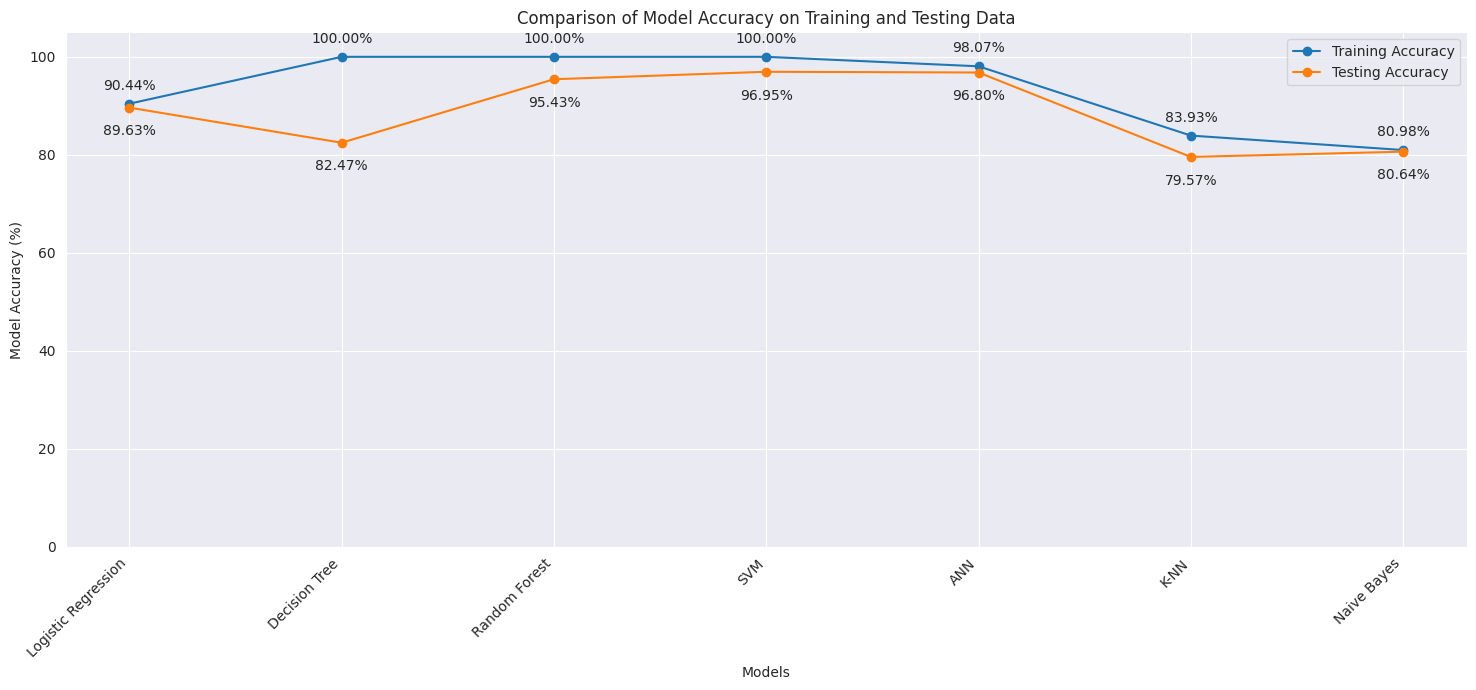

In [ ]:
# line graph to compare accuracy for all the models on training and testing accuracy

# Training accuracies
training_accuracies = {
    'Logistic Regression': lreg_train_accuracy,
    'Decision Tree': dtcl_train_accuracy,
    'Random Forest': rfrs_train_accuracy,
    'SVM': svc_train_accuracy,
    'ANN': mlp_train_accuracy,
    'K-NN': knn_train_accuracy,
    'Naive Bayes': nb_train_accuracy
}

# Testing accuracies
testing_accuracies = {
    'Logistic Regression': lreg_test_accuracy,
    'Decision Tree': dtcl_test_accuracy,
    'Random Forest': rfrs_test_accuracy,
    'SVM': svc_test_accuracy,
    'ANN': mlp_test_accuracy,
    'K-NN': knn_test_accuracy,
    'Naive Bayes': nb_test_accuracy
}


models = list(training_accuracies.keys())
train_acc = list(training_accuracies.values())
test_acc = list(testing_accuracies.values())

plt.figure(figsize=(15, 7))
plt.plot(models, [x * 100 for x in train_acc], label='Training Accuracy', marker='o')
plt.plot(models, [x * 100 for x in test_acc], label='Testing Accuracy', marker='o')

for i, txt in enumerate(train_acc):
    plt.annotate(f"{txt*100:.2f}%", (models[i], train_acc[i]*100), textcoords="offset points", xytext=(0,10), ha='center')
for i, txt in enumerate(test_acc):
    plt.annotate(f"{txt*100:.2f}%", (models[i], test_acc[i]*100), textcoords="offset points", xytext=(0,-20), ha='center')

plt.xlabel('Models')
plt.ylabel('Model Accuracy (%)')
plt.title('Comparison of Model Accuracy on Training and Testing Data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.ylim(0, 105) # Set y-axis limits to accommodate percentages
plt.show()

**Observations:**
- Decision Tree, Random Forest and Support Vector Machine models perform best by Training Accuracy measure [scoring 100%]. However, the three models perform low in terms of Testing Accuracy measure.
- Decision Tree, Random Forest and Support Vector Machine models also show relatively higher variation when comparing their Training and Testing Accuracy score ranges.
- Artificial Neural Network (ANN) model performs best - with higher Training and Testing Accuracy scores of **98.07%** and **96.80%** respectively.
- Artificial Neural Network - Multilayer Perception (ANN - MLP) model also shows less variation between the Training and Testing Accuracy, hence is recommended as the best model for predicting Employee Performance Rating for INX Future Inc.




---

## **7.7 Save the Best Model**


---


In [ ]:
# Save the model to the specified path

with open('/content/gdrive/MyDrive/PRCL_10281-employee_performance_analysis/3-src/2-models/mlp_classifier_model.pkl', 'wb') as file:
    pickle.dump(model_mlp, file)

# **Recommendations to Improve Employee Performance Rating**
* We found out that the following features have a significant impact on Employee Performance Rating in their decending order:
 - EmpEnvironmentSatisfaction,
 - EmpLastSalaryHikePercent,
 - YearsSinceLastPromotion,
 - YearsWithCurrManager,
 - ExperienceYearsAtThisCompany,
 - ExperienceYearsInCurrentRole,
 - EmpWorkLifeBalance.

* The least impactful features are:
 - TrainingTimesLastYear,
 - EmpDepartment,
 - EmpJobRole,
 - Gender,
 - EmpJobSatisfaction.

* **The top 3 factors affecting employee performance are:**
 - _EmpEnvironmentSatisfaction_,
 - _EmpLastSalaryHikePercent_,
 - _YearsSinceLastPromotion_,

 **NB:**
 - INX Future Inc must focus focus on the top critical factors affecting performance rating.

 - The company must strive to provide a better environment in order to boost performance rating.

 - The company should regularly promote employees so that they keep motivated to perform better.

 - The company should increase the salary for employees regularly since stagnant salaries likely lead to poor employee performance. Employees will also likely struggle to maintain a better worklife balance.


# **Results and conclusion**
The project aimed to build a predictive model to enable INX Future Inc. to predict employee performance rating. A datset for employee performance was provided. Feature engineering was conducted in order to come up with insightful features that impact performance rating. The following seven models were evaluated:

* Logistic Regression

* Decision Tree

* Random Forest

* Support Vector Machine

* Artificial Neural Network (ANN - MLP)

* K-Nearest Neighbors (KNN)

* Naive Bayes

**Artificial Neural Network (ANN - MLP)** proved to be the best model based on training and testing accuracy scores - **98.07% and 96.80%** respectively.